In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [34]:
df=pd.read_csv("Downloads\AC_Data.csv")
## print the top5 records
df.head()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,tempC
0,01-08-2019 00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981,31.0
1,01-08-2019 00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0
2,01-08-2019 00:02,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500,33.0
3,01-08-2019 00:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0
4,01-08-2019 00:04,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475,36.0


In [7]:
#shape of dataset with rows and columns
print(df.shape)

(87840, 19)


In [8]:
#Checking For Exact NULL Values
#df.info()
df.isna().sum()

0            0
AC 1     44132
AC 2     44129
AC 3     44127
AC 4     44136
AC 5     44124
AC 6     44123
AC 7     44161
AC 8     44136
AC 9     44186
AC 10    44150
AC 11    44170
AC 12    44127
AC 13    44121
AC 14    44144
AC 15    44125
AC 16    44130
AC 17    44126
AC 18    44117
dtype: int64

In [9]:
df.describe()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
count,43708.000000,43711.000000,43713.000000,43704.000000,43716.000000,43717.000000,43679.000000,43704.000000,43654.000000,43690.000000,43670.000000,43713.000000,43719.000000,43696.000000,43715.000000,43710.000000,43714.000000,43723.000000
mean,2.379368,3.868892,2.568411,2.395158,1.421699,2.518138,2.980883,2.548711,3.184382,1.538344,2.406141,2.699639,4.279893,2.917122,4.046283,2.800050,4.218979,6.462676
std,2.276782,2.545147,1.487508,1.797529,0.767218,1.655560,1.473498,1.504482,1.522291,0.685461,1.554481,1.436087,1.847168,1.454946,2.016898,1.606239,1.125491,2.319242
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.123263,1.706508,1.258299,0.970744,1.543779,2.190803,1.766230,2.294635,1.117139,1.591748,1.949729,3.260674,1.852981,3.023501,1.877626,3.752478,4.013579
50%,2.094330,3.791752,2.486992,2.308961,1.380183,2.665063,3.005071,2.608551,3.082134,1.504554,2.351361,2.727152,4.217381,2.787084,4.001279,2.673698,4.611434,7.131194
75%,3.661752,5.460892,3.441527,3.476123,1.870234,3.616988,3.897857,3.496358,4.096374,1.963707,3.254937,3.566744,5.379832,3.824467,5.260193,3.695294,4.958306,8.314639
max,11.194789,11.147141,8.430909,9.879500,5.495358,9.929291,9.356776,9.331506,10.026747,4.625030,10.363151,9.887306,9.796393,9.054969,10.349998,10.654430,5.950261,11.040031


<AxesSubplot:>

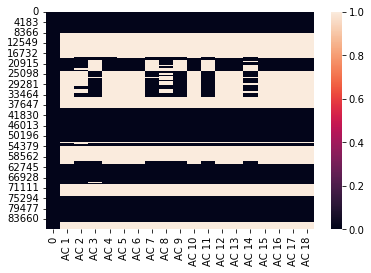

In [10]:
#Checking For NULL Values by Graph
sns.heatmap(df.isnull())

After perfroming basic analysis there are approx 44117 data is missing in every column and also the information which is more important for the tasks to perfrom i.e temprature data we have collect the temprature data and merge with this data.

In [15]:
# For collecting temprature data we have use some modules for scapping data from online  
# I use the world weather online website from scarpping the data by using API key
# First !pip install wwo_hist 
!pip install wwo_hist

  Using cached wwo_hist-0.0.7-py3-none-any.whl (4.6 kB)


In [16]:
from wwo_hist import retrieve_hist_data
import os
desktop = os.path.expanduser("/content")

In [18]:
frequency=3
start_date = '1-aug-2019'
end_date = '30-sept-2019'
api_key = '932604d656bf4a58b4d182227212310'
location_list = ['Gurgaon']

hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)



Retrieving weather data for Gurgaon


Currently retrieving data for Gurgaon: from 2019-08-01 to 2019-08-31
Time elapsed (hh:mm:ss.ms) 0:00:02.153017
Currently retrieving data for Gurgaon: from 2019-09-01 to 2019-09-30
Time elapsed (hh:mm:ss.ms) 0:00:04.169161


export Gurgaon completed!




In [ ]:
df=pd.read_csv("Downloads\AC_Data - Downloads\AC_Data.csv",parse_dates=['Date'],index_col=['Date'])

In [48]:
df.shape

(87840, 20)

In [49]:
df.head()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,tempC
0,01-08-2019 00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981,31.0
1,01-08-2019 00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0
2,01-08-2019 00:02,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500,33.0
3,01-08-2019 00:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0
4,01-08-2019 00:04,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475,36.0


The data contains power for multiple ACs at some hotel in Gurgaon

Identify patterns/trends in the data?
Which AC was used the most/least?
Relate this power data with the outside temperature of Gurgaon. (Feel free to use temperature data from any website online. How will you fetch that data in your analysis?
Using the power data, predict/forecast the power consumption?

In [39]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

AC 1 0.5024  % missing values
AC 2 0.5024  % missing values
AC 3 0.5024  % missing values
AC 4 0.5025  % missing values
AC 5 0.5023  % missing values
AC 6 0.5023  % missing values
AC 7 0.5027  % missing values
AC 8 0.5025  % missing values
AC 9 0.503  % missing values
AC 10 0.5026  % missing values
AC 11 0.5028  % missing values
AC 12 0.5024  % missing values
AC 13 0.5023  % missing values
AC 14 0.5026  % missing values
AC 15 0.5023  % missing values
AC 16 0.5024  % missing values
AC 17 0.5023  % missing values
AC 18 0.5022  % missing values
tempC 0.9944  % missing values


In [50]:
#Info about the type of columns
#Checking For Exact No. of NULL Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       87840 non-null  object 
 1   AC 1    43708 non-null  float64
 2   AC 2    43711 non-null  float64
 3   AC 3    43713 non-null  float64
 4   AC 4    43704 non-null  float64
 5   AC 5    43716 non-null  float64
 6   AC 6    43717 non-null  float64
 7   AC 7    43679 non-null  float64
 8   AC 8    43704 non-null  float64
 9   AC 9    43654 non-null  float64
 10  AC 10   43690 non-null  float64
 11  AC 11   43670 non-null  float64
 12  AC 12   43713 non-null  float64
 13  AC 13   43719 non-null  float64
 14  AC 14   43696 non-null  float64
 15  AC 15   43715 non-null  float64
 16  AC 16   43710 non-null  float64
 17  AC 17   43714 non-null  float64
 18  AC 18   43723 non-null  float64
 19  tempC   488 non-null    float64
dtypes: float64(19), object(1)
memory usage: 13.4+ MB


# Tasks
Identify patterns/trends in the data

Relate this power data with the outside temperature of Gurgaon.



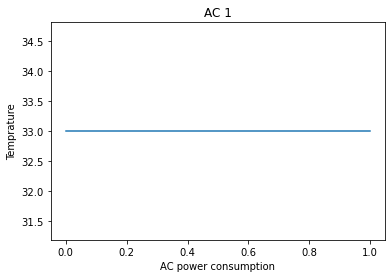

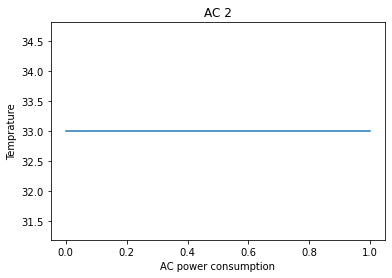

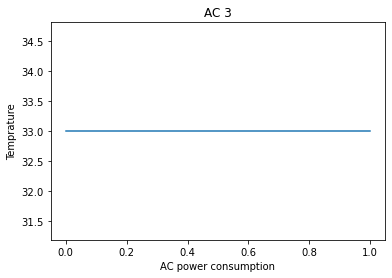

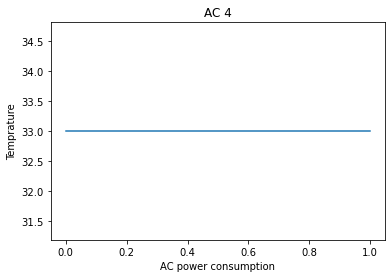

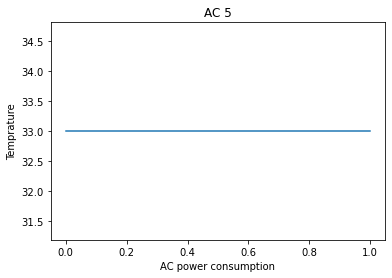

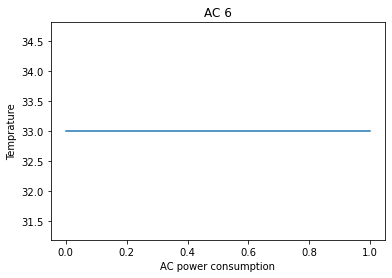

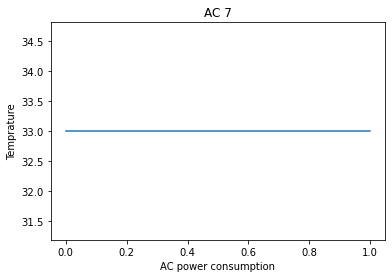

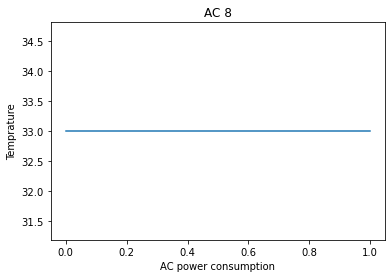

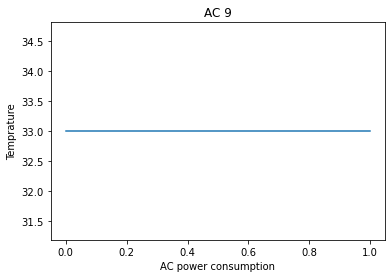

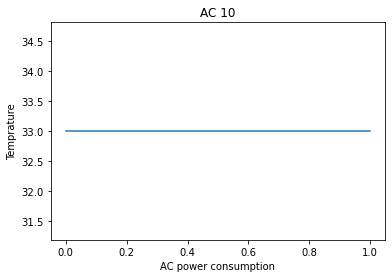

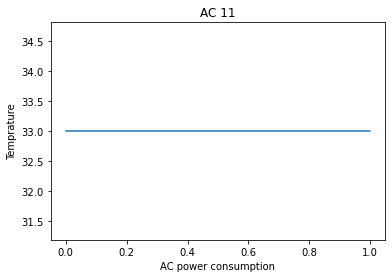

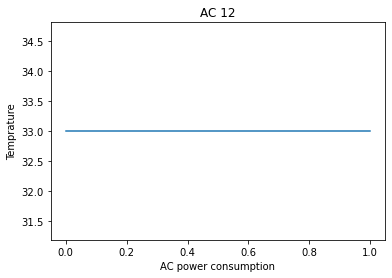

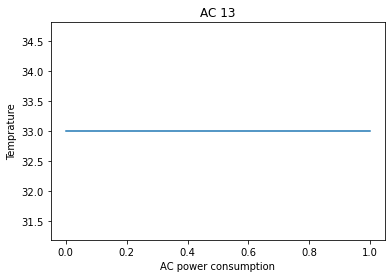

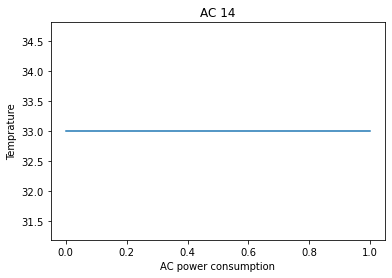

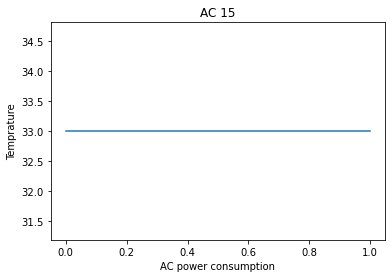

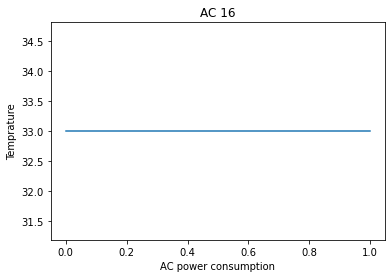

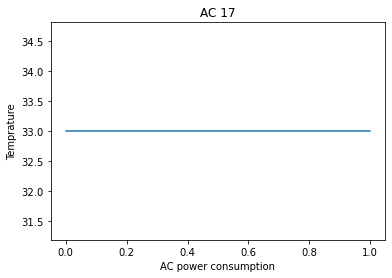

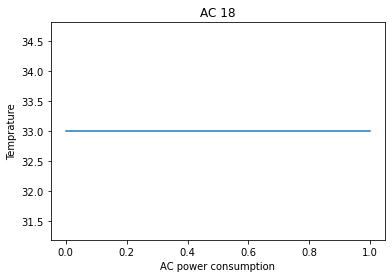

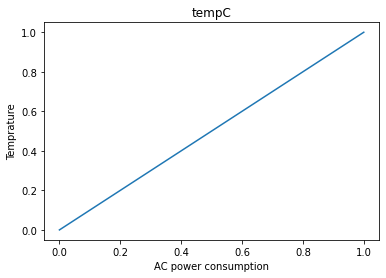

In [52]:
#Let's plot some diagram for this relationship

for feature in features_with_na:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean of AC where the information is missing or present
    data.groupby(feature)['tempC'].median().plot()
    plt.ylabel('Temprature')
    plt.xlabel('AC power consumption')
    plt.title(feature)
    plt.show()

This gives us more insight into our data and real-world actions. Clearly, there is an more upward trend and a recurring event where temprature is high AC Power consumption also high.

There is a positive relationship between power Cosnumption and temperature. As temperature increases so does Power Cosnumption increases.

<AxesSubplot:>

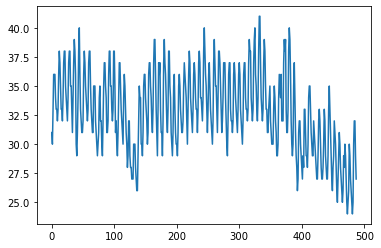

In [53]:
col='tempC'
df[col].plot(kind='line')

# Which AC was used the most/least

In [54]:
numbers={'AC1':'43708.000000',	'AC2':'43711.000000','AC3':'43713.000000'	,'AC4':'43704.000000',	
       'AC5':'43716.000000','AC6':'43717.000000',	'AC7':'43679.000000',	'AC8':'43704.000000',	
      'AC9': '43654.000000',	'AC10':'43690.000000',	'AC11':'43670.000000',	'AC12':'43713.000000',	
       'AC13':'43719.000000','AC14':'43696.000000','AC15':'43715.000000','AC16':'43710.000000',
       'AC17':'43714.000000',	'AC18':'43723.000000'}

In [55]:
Keymax = max(zip(numbers.values(), numbers.keys(),))
print("The AC used most",Keymax)

Keymin = min(zip(numbers.values(), numbers.keys(),))
print("The AC used least",Keymin)

The AC used most ('43723.000000', 'AC18')
The AC used least ('43654.000000', 'AC9')


# Using the power data, predict/forecast the power consumption?

Text(0.5, 1.0, 'Forecasts for power consumption')

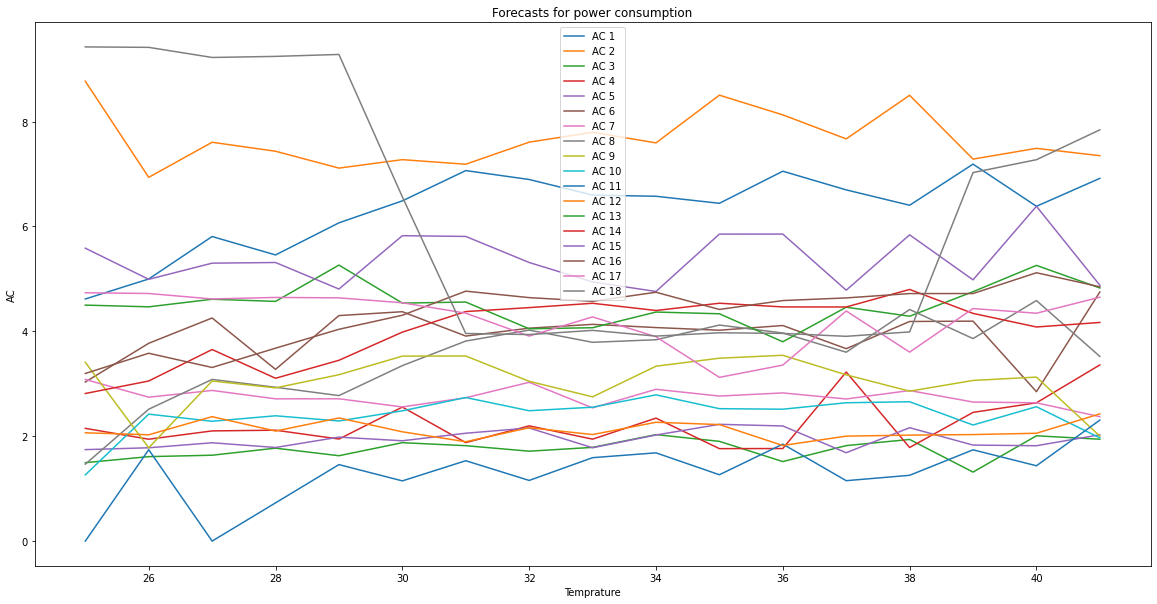

In [57]:
a=['AC 1','AC 2','AC 3','AC 4','AC 5','AC 6','AC 7',
   'AC 8','AC 9','AC 10','AC 11','AC 12','AC 13',
   'AC 14','AC 15','AC 16','AC 17','AC 18']

df.groupby('tempC')[a].median().plot(figsize=(20,10))
plt.xlabel('Temprature')
plt.ylabel('AC')
plt.title("Forecasts for power consumption")

<Figure size 1440x1080 with 0 Axes>

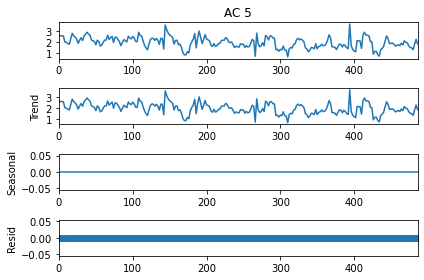

<Figure size 1440x1080 with 0 Axes>

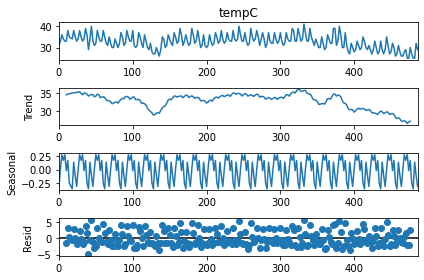

In [60]:
#for seasonal decompose we have to remove the NA values
df=df.dropna()
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['AC 5'],model='additive',period=1)
plt.figure(figsize=(20,15))
result.plot()
plt.show()



result = seasonal_decompose(df['tempC'],model='additive',period=11)
plt.figure(figsize=(20,15))
result.plot()
plt.show()